# <center> Bài tập Thực hành môn Khai phá Dữ liệu </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

##  1. Thuật toán K-means

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [141]:
# Load data
blobs = pd.read_csv('data.csv')
colnames = list(blobs.columns[1:-1])

display(blobs.head())

,ID,x,y,cluster
0,0,24.412,32.932,2
1,1,35.190,12.189,1
2,2,26.288,41.718,2
3,3,0.376,15.506,0
4,4,26.116,3.963,1


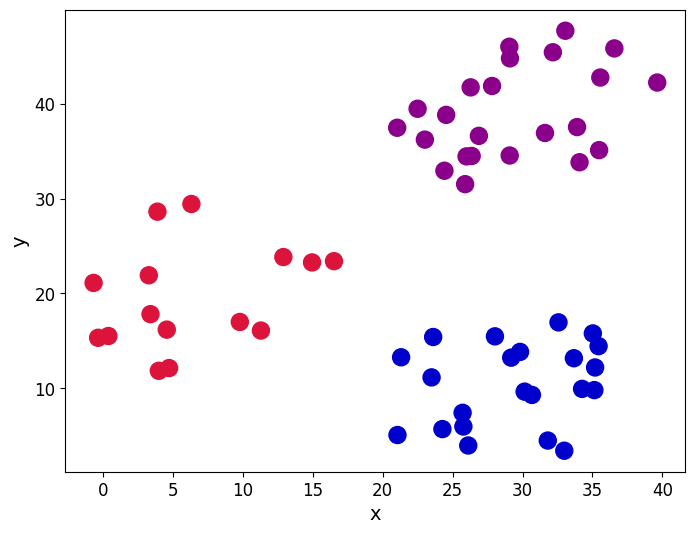

In [142]:
customcmap = ListedColormap(['crimson', 'mediumblue', 'darkmagenta'])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x= blobs['x'], y= blobs['y'], s= 150, c= blobs['cluster'].astype('category'), cmap= customcmap)

ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()


In [143]:
def initiate_centroids(k, df):
    '''
        Select k date points as centroids
        k: number of centroids
        df: pandas dataframe    
    '''

    centroids = df.sample(k)
    return centroids

np.random.seed(42)
k = 3
df = blobs[['x','y']]
centroids = initiate_centroids(k, df)

print(centroids)

         x       y
0   24.412  32.932
5   25.893  31.515
36  26.878  36.609


In [144]:
def RSSerror(a, b):
    '''
        Calculate sum of squared errors.
        a and b are numpy arrays
    '''

    return np.sum(np.square(a-b))

In [145]:
for i, centroid in enumerate(range(centroids.shape[0])):
    err = RSSerror(centroids.iloc[centroid,:], df.iloc[49,:])
    print('Error for centroid {0}: {1:.2f}'.format(i, err))

Error for centroid 0: 406.92
Error for centroid 1: 331.07
Error for centroid 2: 500.31


In [146]:
def centroid_assignation(dset, centroids):
    '''
        Given a dataframe 'dset' and a set of 'centroids', we assign each
        data point in 'dset' to a centroid.
        - dset - pandas dataframe with observations
        - centroids - pandas dataframe with centroids
    '''

    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            error = RSSerror(centroids.iloc[centroid,:], dset.iloc[obs,:])
            all_errors = np.append(all_errors, error)

        # Get the nearest centroid and the error
        nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors

In [165]:
df['centroid'], df['error'] = centroid_assignation(df, centroids)

df.head()

,x,y,centroid,error
0,24.412,32.932,2,61.380524
1,35.190,12.189,1,37.415091
2,26.288,41.718,2,16.216075
3,0.376,15.506,0,51.798518
4,26.116,3.963,1,52.188602


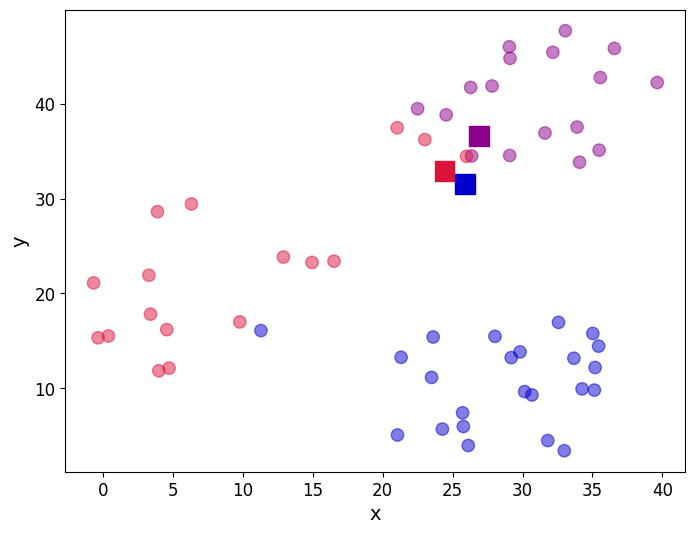

In [148]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o', c= df['centroid'].astype('category'), cmap= customcmap, s= 80, alpha= 0.5)

plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker= 's', s= 200, c= [0,1,2], cmap= customcmap)

ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [149]:
print('The total error is {0:.2f}'.format(df['error'].sum()))

The total error is 20606.95


In [150]:
centroids = df.groupby('centroid').agg('mean').loc[:,colnames].reset_index(drop= True)
centroids

,x,y
0,9.889444,23.242611
1,28.435750,11.546250
2,30.759333,40.311167


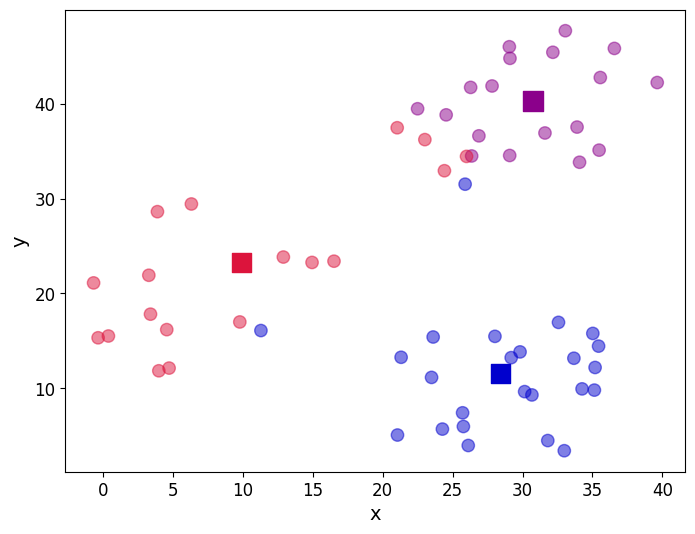

In [151]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o', c= df['centroid'].astype('category'), cmap= customcmap, s= 80, alpha= 0.5)

plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker= 's', s= 200, c= [0,1,2], cmap= customcmap)

ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [152]:
def Kmeans(dset, k=2, tol=1e-4):
    '''
        K-means implementation for a
        'dset': DataFrame with observations
        'k': Number of cluster, default k=2
        'tol': Tolerance = 1E-4
    '''

    # Let us work in a copy, so we dont mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the inerations
    error = []
    goAHead = True
    iteration = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)

    while (goAHead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], iteration_error = centroid_assignation(working_dset, centroids)
        error.append(sum(iteration_error))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop= True)

        # Step 6 - Restart the iteration
        if iteration > 0:
            # Is the error less than a tolerance (1E-4)
            if error[iteration-1] - error[iteration] <= tol:
                goAHead = False
        iteration += 1
    
    working_dset['centroid'], iteration_error = centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('mean').reset_index(drop= True)
    return working_dset['centroid'], iteration_error, centroids


In [153]:
np.random.seed(42)
df['centroid'], df['error'], centroids = Kmeans(df[['x','y']], 3)
df.head()

,x,y,centroid,error
0,24.412,32.932,2,61.380524
1,35.190,12.189,1,37.415091
2,26.288,41.718,2,16.216075
3,0.376,15.506,0,51.798518
4,26.116,3.963,1,52.188602


In [154]:
centroids

,x,y
0,6.322867,19.559800
1,29.330864,10.432409
2,29.304957,39.050783


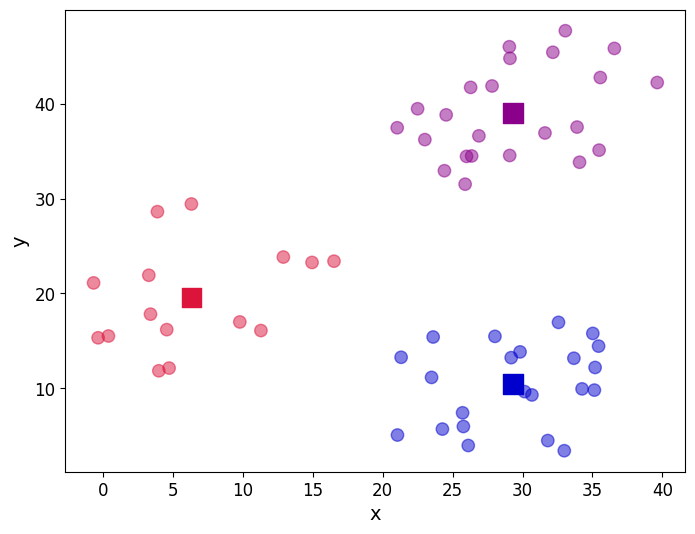

In [155]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(df.iloc[:,0], df.iloc[:,1], marker= 'o', c= df['centroid'].astype('category'), cmap= customcmap, s= 80, alpha= 0.5)

plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1], marker= 's', s= 200, c= [0,1,2], cmap= customcmap)

ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

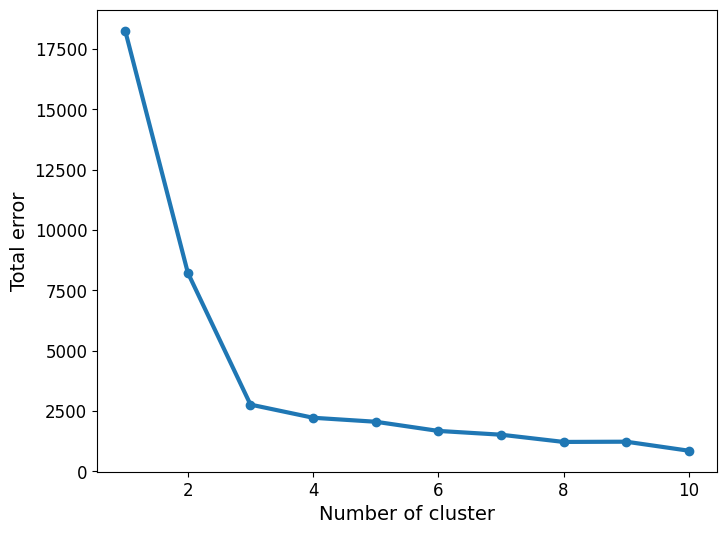

In [156]:
error_total = []
n = 10
df_elbow = blobs[['x','y']]
for i in range(n):
    _, my_errors, _ = Kmeans(df_elbow, i+1)
    error_total.append(sum(my_errors))

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(range(1,n+1), error_total, linewidth = 3, marker = 'o')

ax.set_xlabel(r'Number of cluster', fontsize = 14)
ax.set_ylabel(r'Total error', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

##  2. Thuật toán K-medians

In [166]:
k_medians_df = blobs[['x','y']]

In [158]:
def MDE(a, b):
    return np.sum(np.abs(a - b))

In [159]:
def k_median_centroid_assignation(dset, centroids):
    '''
        Given a dataframe 'dset' and a set of 'centroids', we assign each
        data point in 'dset' to a centroid.
        - dset - pandas dataframe with observations
        - centroids - pandas dataframe with centroids
    '''

    k = centroids.shape[0]
    n = dset.shape[0]
    assignation = []
    assign_errors = []
    for obs in range(n):
        # Estimate error
        all_errors = np.array([])
        for centroid in range(k):
            error = MDE(centroids.iloc[centroid,:], dset.iloc[obs,:])
            all_errors = np.append(all_errors, error)

        # Get the nearest centroid and the error
        nearest_centroid = np.where(all_errors == np.amin(all_errors))[0].tolist()[0]
        nearest_centroid_error = np.amin(all_errors)

        # Add values to corresponding lists
        assignation.append(nearest_centroid)
        assign_errors.append(nearest_centroid_error)
    return assignation, assign_errors

In [160]:
def Kmedians(dset, k=2, tol=1e-4):
    '''
        K-medians implementation for a
        'dset': DataFrame with observations
        'k': Number of cluster, default k=2
        'tol': Tolerance = 1E-4
    '''

    # Let us work in a copy, so we dont mess the original
    working_dset = dset.copy()
    # We define some variables to hold the error, the
    # stopping signal and a counter for the inerations
    error = []
    goAHead = True
    iteration = 0

    # Step 2: Initiate clusters by defining centroids
    centroids = initiate_centroids(k, dset)

    while (goAHead):
        # Step 3 and 4 - Assign centroids and calculate error
        working_dset['centroid'], iteration_error = k_median_centroid_assignation(working_dset, centroids)
        error.append(sum(iteration_error))

        # Step 5 - Update centroid position
        centroids = working_dset.groupby('centroid').agg('median').reset_index(drop= True)

        # Step 6 - Restart the iteration
        if iteration > 0:
            # Is the error less than a tolerance (1E-4)
            if error[iteration-1] - error[iteration] <= tol:
                goAHead = False
        iteration += 1
    
    working_dset['centroid'], iteration_error = k_median_centroid_assignation(working_dset, centroids)
    centroids = working_dset.groupby('centroid').agg('median').reset_index(drop= True)
    return working_dset['centroid'], iteration_error, centroids

In [164]:
np.random.seed(42)
k_medians_df['centroid'], k_medians_df['error'], k_median_centroids = Kmedians(k_medians_df[['x','y']], 3)
k_median_centroids

,x,y
0,4.550,17.8100
1,29.986,10.5365
2,29.056,37.5350


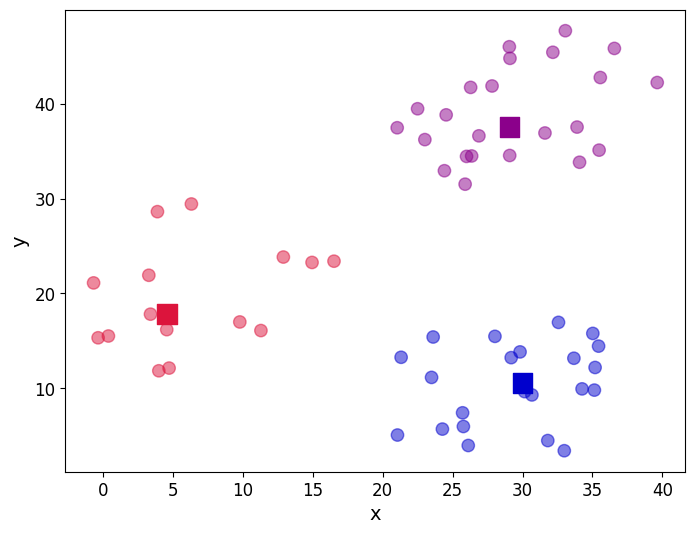

In [162]:
fig, ax = plt.subplots(figsize=(8,6))

plt.scatter(k_medians_df.iloc[:,0], k_medians_df.iloc[:,1], marker= 'o', c= k_medians_df['centroid'].astype('category'), cmap= customcmap, s= 80, alpha= 0.5)

plt.scatter(k_median_centroids.iloc[:,0], k_median_centroids.iloc[:,1], marker= 's', s= 200, c= [0,1,2], cmap= customcmap)

ax.set_xlabel(r'x', fontsize = 14)
ax.set_ylabel(r'y', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

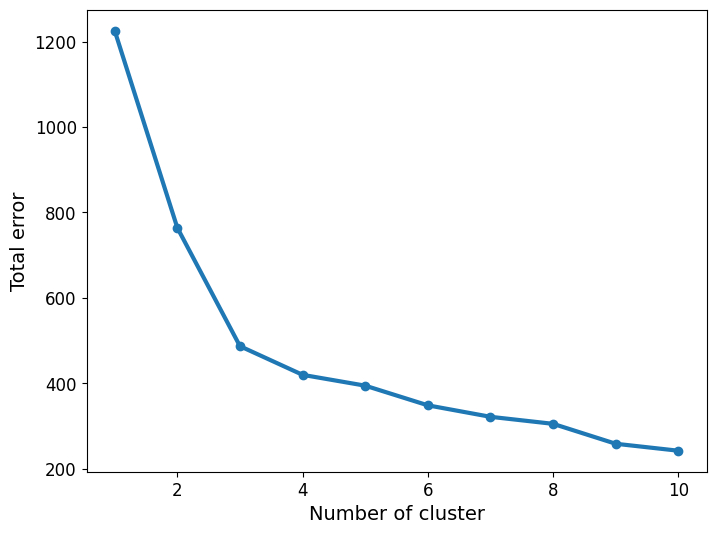

In [163]:
error_total = []
n = 10
df_elbow = blobs[['x','y']]
for i in range(n):
    _, my_errors, _ = Kmedians(df_elbow, i+1)
    error_total.append(sum(my_errors))

fig, ax = plt.subplots(figsize=(8,6))

plt.plot(range(1,n+1), error_total, linewidth = 3, marker = 'o')

ax.set_xlabel(r'Number of cluster', fontsize = 14)
ax.set_ylabel(r'Total error', fontsize = 14)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()